# Can we find any sentiments on Wall Street ?

![](https://image.freepik.com/free-vector/stock-market-analysis-concept_23-2148599179.jpg)

**Imports**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## About Data

[Dataset](https://www.kaggle.com/aaron7sun/stocknews)

>There are two channels of data provided in this dataset:

>News data: I crawled historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date.
(Range: 2008-06-08 to 2016-07-01)
Stock data: Dow Jones Industrial Average (DJIA) is used to "prove the concept".
(Range: 2008-08-08 to 2016-07-01)
I provided three data files in .csv format:

>RedditNews.csv: two columns
The first column is the "date", and second column is the "news headlines".
All news are ranked from top to bottom based on how hot they are.
Hence, there are 25 lines for each date.
DJIA_table.csv: 
Downloaded directly from Yahoo Finance: check out the web page for more info.
CombinedNewsDJIA.csv:
To make things easier for my students, I provide this combined dataset with 27 columns.
The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25".

In [2]:
df = pd.read_csv('data/Combined_news_DJIA.csv')
df[:2]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


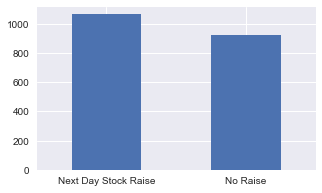

In [3]:
df.Label.value_counts().rename(index={1:'Next Day Stock Raise',0:'No Raise'}).plot.bar(rot=0,figsize=(5,3));

In [4]:
features = [f'Top{x+1}' for x in range(25)]
target = 'Label'

## Vader on Wall Street

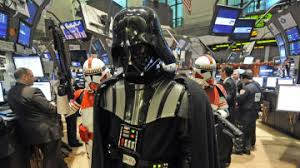

> [VADER](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] (we sincerely appreciate all attributions and readily accept most contributions, but please don't hold us liable).

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristianexer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
%%time
copy_df = df.copy()
copy_df[:1]

CPU times: user 1.08 ms, sys: 425 µs, total: 1.51 ms
Wall time: 1.02 ms


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


**Extract Sentiments from each news title**

In [8]:
copy_df[features] = copy_df[features].applymap(lambda x: sid.polarity_scores(x) if type(x) == str else {})
copy_df[:1]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp...","{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...","{'neg': 0.424, 'neu': 0.576, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...","{'neg': 0.107, 'neu': 0.79, 'pos': 0.103, 'com...",...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.078, 'neu': 0.819, 'pos': 0.103, 'co...","{'neg': 0.092, 'neu': 0.78, 'pos': 0.128, 'com...","{'neg': 0.112, 'neu': 0.773, 'pos': 0.116, 'co...","{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...","{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'comp...","{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou...","{'neg': 0.65, 'neu': 0.35, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp..."


**Some steps to format the data**

In [9]:
copy_df = copy_df.set_index('Date')[features].unstack().reset_index()
copy_df[:3]

,level_0,Date,0
0,Top1,2008-08-08,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp..."
1,Top1,2008-08-11,"{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'comp..."
2,Top1,2008-08-12,"{'neg': 0.169, 'neu': 0.656, 'pos': 0.175, 'co..."


In [10]:
sentiments = pd.DataFrame.from_dict(copy_df[0].values.tolist())
sentiments[:3]

,neg,neu,pos,compound
0,0.262,0.738,0.000,-0.5994
1,0.000,0.668,0.332,0.8156
2,0.169,0.656,0.175,0.0258


In [11]:
copy_df[sentiments.columns] = sentiments
copy_df = copy_df.drop([0],axis=1).rename(columns={'level_0':'news_label'})
copy_df[:3]

,news_label,Date,neg,neu,pos,compound
0,Top1,2008-08-08,0.262,0.738,0.000,-0.5994
1,Top1,2008-08-11,0.000,0.668,0.332,0.8156
2,Top1,2008-08-12,0.169,0.656,0.175,0.0258


In [12]:
clean_df = copy_df.groupby('Date',as_index=False).agg({x:['mean','sum'] for x in sentiments.columns}).copy()
clean_df.columns = [ '_'.join(x) if x[1] != '' else x[0].lower() for x in clean_df.columns]
clean_df = clean_df.merge(df[['Date','Label']],left_on='date',right_on='Date',how='left').drop(['Date'],axis=1)
clean_df['date'] = pd.to_datetime(clean_df['date'] )
clean_df[:3]

,date,neg_mean,neg_sum,neu_mean,neu_sum,pos_mean,pos_sum,compound_mean,compound_sum,Label
0,2008-08-08,0.19284,4.821,0.76920,19.230,0.03800,0.950,-0.309440,-7.7360,0
1,2008-08-11,0.15028,3.757,0.78260,19.565,0.06708,1.677,-0.120740,-3.0185,1
2,2008-08-12,0.15712,3.928,0.78496,19.624,0.05788,1.447,-0.217556,-5.4389,0


Now let's do some data enrichment for those sentiments

In [13]:
import pandas_datareader.data as web

In [14]:
min_date,max_date = clean_df.date.min(),clean_df.date.max()
min_date,max_date

(Timestamp('2008-08-08 00:00:00'), Timestamp('2016-07-01 00:00:00'))

**DJI stock prices from the same period of time**

In [15]:
stock = web.DataReader('^DJI', 'stooq',start=min_date,end=max_date).reset_index()
stock.columns = stock.columns.str.lower()
stock[:3]

,date,open,high,low,close,volume
0,2016-07-01,17924.24,18002.38,17916.91,17949.37,82167191
1,2016-06-30,17712.76,17930.61,17711.80,17929.99,133078223
2,2016-06-29,17456.02,17704.51,17456.02,17694.68,106343184


**Merged the clean data with the stock prices data**

In [16]:
enriched_df = clean_df.merge(stock,on='date',how='left').sort_values(by='date').copy()
enriched_df[:3]

,date,neg_mean,neg_sum,neu_mean,neu_sum,pos_mean,pos_sum,compound_mean,compound_sum,Label,open,high,low,close,volume
0,2008-08-08,0.19284,4.821,0.76920,19.230,0.03800,0.950,-0.309440,-7.7360,0,11432.1,11760.0,11388.0,11734.3,212842817
1,2008-08-11,0.15028,3.757,0.78260,19.565,0.06708,1.677,-0.120740,-3.0185,1,11729.7,11867.1,11675.5,11782.3,183186104
2,2008-08-12,0.15712,3.928,0.78496,19.624,0.05788,1.447,-0.217556,-5.4389,0,11781.7,11782.3,11601.5,11642.5,173686814


**Features Correlation**

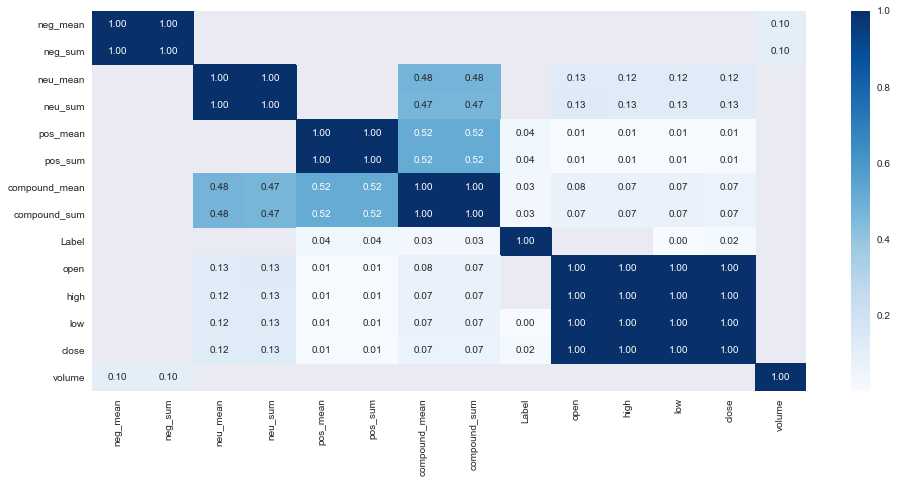

In [17]:
plt.figure(figsize=(16,7))
corr = enriched_df.corr(method='spearman')
sns.heatmap(corr[corr>0],annot=True,fmt='.2f',cmap='Blues');

**Close Price and Compund Mean hilighted by given Label**

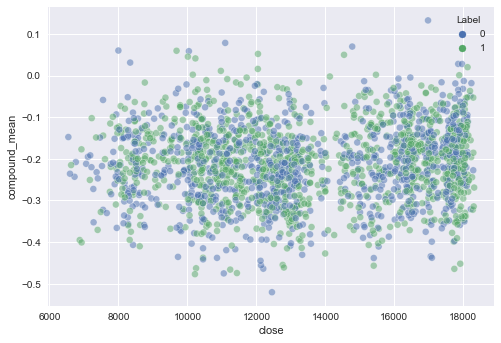

In [18]:
sns.scatterplot(x=enriched_df['close'],y=enriched_df['compound_mean'],hue=enriched_df['Label'],alpha=.5);

**Now let's use an XGBoost model to see what is driving prices changes**

In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

We well use the compound mean as feature to capture the news influence in our model

In [20]:
features = ['compound_mean','open','high','low']
target = 'close'

**XGBoost Regressor**

In [21]:
params = {'eval_metric': 'rmse', 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:gamma', 'use_label_encoder': False}
reg = xgb.XGBRegressor(**params)
reg.fit(enriched_df[features],enriched_df[target])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:gamma', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

Let's look at one of our trees

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

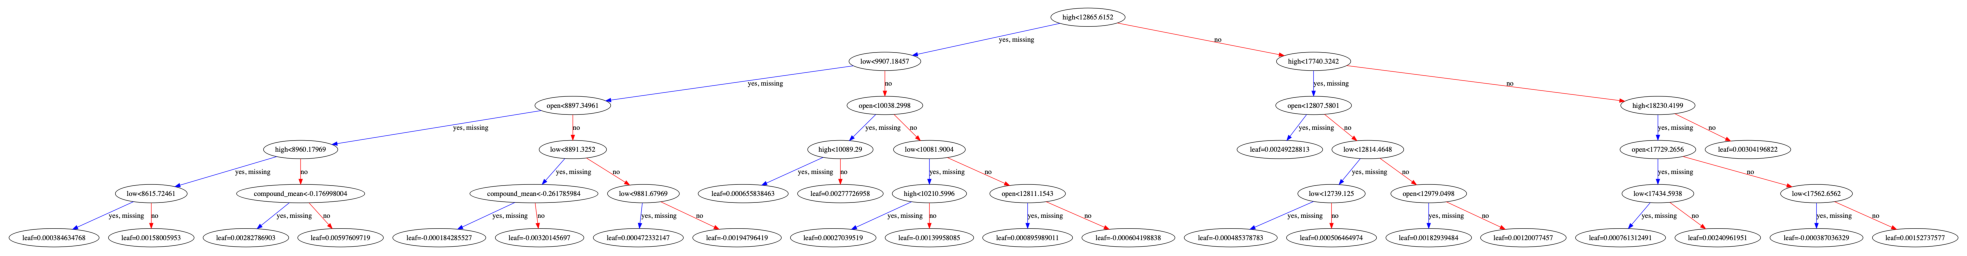

In [22]:
fig,ax = plt.subplots(1,1,figsize=(35,10))
xgb.plot_tree(reg,num_trees=50,ax=ax);

**Feature Importance**

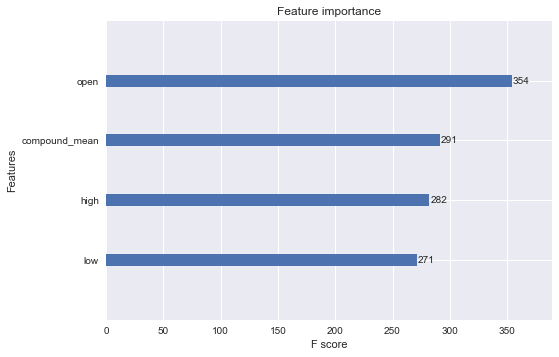

In [23]:
xgb.plot_importance(reg);

**Feature Impact**

In [24]:
import shap

In [25]:
expl = shap.TreeExplainer(reg)

In [26]:
shap_values = expl.shap_values(enriched_df[features],enriched_df[target])

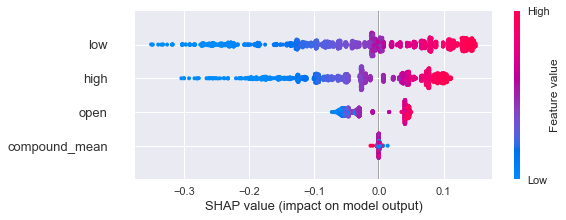

In [27]:
shap.summary_plot(shap_values,enriched_df[features])